In [1]:
import pandas as pd
import numpy as np


In [31]:
df = pd.read_csv('../final_data/main_df.csv')
df = df.drop('Unnamed: 0', axis=1)

In [32]:
df

,open,high,low,close,volume,ema_100,ema_200,ema_signal,vwap,vwap_signal,STOCHk_14_3_3,STOCHd_14_3_3,stochrsi_signal,MACD_12_26_9,MACDs_12_26_9,MACDh_12_26_9,macd_signal,trend
0,1.14767,1.14784,1.14724,1.14772,713,1.138854,1.136817,1,1.147701,-1,72.529313,75.162355,0,0.002632,0.002986,-0.000353,-1,0
1,1.14772,1.14784,1.14676,1.14680,1107,1.139011,1.136916,1,1.147502,-1,68.802345,71.936829,0,0.002427,0.002874,-0.000447,-1,0
2,1.14683,1.14738,1.14681,1.14705,1040,1.139171,1.137017,1,1.147230,-1,64.325753,68.552470,0,0.002258,0.002751,-0.000493,-1,0
3,1.14705,1.14705,1.14657,1.14680,1043,1.139322,1.137114,1,1.147009,-1,55.700296,62.942798,0,0.002080,0.002617,-0.000536,-1,0
4,1.14676,1.14724,1.14668,1.14722,1674,1.139478,1.137215,1,1.146989,-1,50.428720,56.818256,0,0.001951,0.002483,-0.000533,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99962,1.06736,1.06766,1.06709,1.06712,3963,1.072240,1.074366,-1,1.067112,-1,11.843782,9.664968,1,-0.001400,-0.001278,-0.000121,-1,-1
99963,1.06712,1.06751,1.06680,1.06744,5103,1.072145,1.074297,-1,1.067256,-1,17.241379,13.503718,1,-0.001348,-0.001292,-0.000056,-1,-1
99964,1.06742,1.06750,1.06709,1.06730,3513,1.072049,1.074227,-1,1.067276,-1,16.666667,15.250609,1,-0.001303,-0.001295,-0.000009,-1,-1
99965,1.06732,1.06786,1.06731,1.06783,2894,1.071965,1.074163,-1,1.067369,-1,22.495895,18.801314,0,-0.001211,-0.001278,0.000066,1,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [34]:
df['open_change'] = df['open'] - df['open'].shift(1)
df['high_change'] = df['high'] - df['high'].shift(1)
df['low_change'] = df['low'] - df['low'].shift(1)
df['close_change'] = df['close'] - df['close'].shift(1)

df['open_pct_change'] = df['open_change'] / df['open'].shift(1) * 100
df['high_pct_change'] = df['high_change'] / df['high'].shift(1) * 100
df['low_pct_change'] = df['low_change'] / df['low'].shift(1) * 100
df['close_pct_change'] = df['close_change'] / df['close'].shift(1) * 100

df['volume_change'] = df['volume'] - df['volume'].shift(1)
df['volume_pct_change'] = df['volume_change'] / df['volume'].shift(1) * 100




In [35]:
df = df.dropna()
df.reset_index(inplace=True)
df

,index,open,high,low,close,volume,ema_100,ema_200,ema_signal,vwap,...,open_change,high_change,low_change,close_change,open_pct_change,high_pct_change,low_pct_change,close_pct_change,volume_change,volume_pct_change
0,1,1.14772,1.14784,1.14676,1.14680,1107,1.139011,1.136916,1,1.147502,...,0.00005,0.00000,-0.00048,-0.00092,0.004357,0.000000,-0.041840,-0.080159,394.0,55.259467
1,2,1.14683,1.14738,1.14681,1.14705,1040,1.139171,1.137017,1,1.147230,...,-0.00089,-0.00046,0.00005,0.00025,-0.077545,-0.040075,0.004360,0.021800,-67.0,-6.052394
2,3,1.14705,1.14705,1.14657,1.14680,1043,1.139322,1.137114,1,1.147009,...,0.00022,-0.00033,-0.00024,-0.00025,0.019183,-0.028761,-0.020928,-0.021795,3.0,0.288462
3,4,1.14676,1.14724,1.14668,1.14722,1674,1.139478,1.137215,1,1.146989,...,-0.00029,0.00019,0.00011,0.00042,-0.025282,0.016564,0.009594,0.036624,631.0,60.498562
4,5,1.14721,1.14721,1.14621,1.14640,1404,1.139615,1.137306,1,1.146836,...,0.00045,-0.00003,-0.00047,-0.00082,0.039241,-0.002615,-0.040988,-0.071477,-270.0,-16.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,99962,1.06736,1.06766,1.06709,1.06712,3963,1.072240,1.074366,-1,1.067112,...,0.00056,0.00006,0.00035,-0.00025,0.052493,0.005620,0.032810,-0.023422,-1274.0,-24.326905
99962,99963,1.06712,1.06751,1.06680,1.06744,5103,1.072145,1.074297,-1,1.067256,...,-0.00024,-0.00015,-0.00029,0.00032,-0.022485,-0.014049,-0.027177,0.029987,1140.0,28.766086
99963,99964,1.06742,1.06750,1.06709,1.06730,3513,1.072049,1.074227,-1,1.067276,...,0.00030,-0.00001,0.00029,-0.00014,0.028113,-0.000937,0.027184,-0.013115,-1590.0,-31.158142
99964,99965,1.06732,1.06786,1.06731,1.06783,2894,1.071965,1.074163,-1,1.067369,...,-0.00010,0.00036,0.00022,0.00053,-0.009368,0.033724,0.020617,0.049658,-619.0,-17.620268


In [36]:
df = df.drop("index", axis=1)

In [37]:
df

,open,high,low,close,volume,ema_100,ema_200,ema_signal,vwap,vwap_signal,...,open_change,high_change,low_change,close_change,open_pct_change,high_pct_change,low_pct_change,close_pct_change,volume_change,volume_pct_change
0,1.14772,1.14784,1.14676,1.14680,1107,1.139011,1.136916,1,1.147502,-1,...,0.00005,0.00000,-0.00048,-0.00092,0.004357,0.000000,-0.041840,-0.080159,394.0,55.259467
1,1.14683,1.14738,1.14681,1.14705,1040,1.139171,1.137017,1,1.147230,-1,...,-0.00089,-0.00046,0.00005,0.00025,-0.077545,-0.040075,0.004360,0.021800,-67.0,-6.052394
2,1.14705,1.14705,1.14657,1.14680,1043,1.139322,1.137114,1,1.147009,-1,...,0.00022,-0.00033,-0.00024,-0.00025,0.019183,-0.028761,-0.020928,-0.021795,3.0,0.288462
3,1.14676,1.14724,1.14668,1.14722,1674,1.139478,1.137215,1,1.146989,-1,...,-0.00029,0.00019,0.00011,0.00042,-0.025282,0.016564,0.009594,0.036624,631.0,60.498562
4,1.14721,1.14721,1.14621,1.14640,1404,1.139615,1.137306,1,1.146836,-1,...,0.00045,-0.00003,-0.00047,-0.00082,0.039241,-0.002615,-0.040988,-0.071477,-270.0,-16.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,1.06736,1.06766,1.06709,1.06712,3963,1.072240,1.074366,-1,1.067112,-1,...,0.00056,0.00006,0.00035,-0.00025,0.052493,0.005620,0.032810,-0.023422,-1274.0,-24.326905
99962,1.06712,1.06751,1.06680,1.06744,5103,1.072145,1.074297,-1,1.067256,-1,...,-0.00024,-0.00015,-0.00029,0.00032,-0.022485,-0.014049,-0.027177,0.029987,1140.0,28.766086
99963,1.06742,1.06750,1.06709,1.06730,3513,1.072049,1.074227,-1,1.067276,-1,...,0.00030,-0.00001,0.00029,-0.00014,0.028113,-0.000937,0.027184,-0.013115,-1590.0,-31.158142
99964,1.06732,1.06786,1.06731,1.06783,2894,1.071965,1.074163,-1,1.067369,-1,...,-0.00010,0.00036,0.00022,0.00053,-0.009368,0.033724,0.020617,0.049658,-619.0,-17.620268


In [58]:
scaler = MinMaxScaler()

In [48]:

df[[
    'open', 'high', 'low', 'close', 'volume', 'ema_100', 'ema_200', 'vwap', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 
    'MACD_12_26_9',	'MACDs_12_26_9', 'MACDh_12_26_9', 'volume_change', 'volume_pct_change', 
    'open_change', 'high_change', 'low_change', 'close_change', 'open_pct_change', 'high_pct_change', 
    'low_pct_change', 'close_pct_change'
    ]] = scaler.fit_transform(df[[
                                    'open', 'high', 'low', 'close', 'volume', 'ema_100', 'ema_200', 'vwap', 'STOCHk_14_3_3',
                                    'STOCHd_14_3_3', 'MACD_12_26_9', 'MACDs_12_26_9', 'MACDh_12_26_9', 'volume_change', 'volume_pct_change',
                                    'open_change', 'high_change', 'low_change', 'close_change', 'open_pct_change', 'high_pct_change', 
                                    'low_pct_change', 'close_pct_change']])


In [50]:
df.to_csv('dmn.csv')

In [53]:
df

,open,high,low,close,volume,ema_100,ema_200,ema_signal,vwap,vwap_signal,...,open_change,high_change,low_change,close_change,open_pct_change,high_pct_change,low_pct_change,close_pct_change,volume_change,volume_pct_change
0,0.643963,0.641165,0.642211,0.640906,0.000594,0.622354,0.611667,1,0.642020,-1,...,0.454498,0.457221,0.495304,0.499856,0.441762,0.432728,0.485533,0.473435,0.584771,0.001086
1,0.641006,0.639632,0.642378,0.641737,0.000558,0.622913,0.612031,1,0.641112,-1,...,0.429916,0.444567,0.509945,0.533448,0.418297,0.421069,0.499483,0.504339,0.584609,0.000657
2,0.641737,0.638533,0.641580,0.640906,0.000559,0.623441,0.612381,1,0.640374,-1,...,0.458944,0.448143,0.501934,0.519093,0.446009,0.424361,0.491847,0.491125,0.584634,0.000701
3,0.640773,0.639166,0.641945,0.642302,0.000898,0.623986,0.612745,1,0.640308,-1,...,0.445607,0.462448,0.511602,0.538329,0.433270,0.437548,0.501063,0.508832,0.584854,0.001123
4,0.642269,0.639066,0.640383,0.639577,0.000753,0.624465,0.613073,1,0.639796,-1,...,0.464958,0.456396,0.495580,0.502728,0.451756,0.431968,0.485790,0.476066,0.584538,0.000586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,0.376969,0.373996,0.377369,0.376171,0.002126,0.388928,0.386083,-1,0.373709,-1,...,0.467835,0.458872,0.518232,0.519093,0.455553,0.434364,0.508074,0.490632,0.584186,0.000529
99962,0.376171,0.373496,0.376404,0.377234,0.002738,0.388596,0.385834,-1,0.374189,-1,...,0.446914,0.453095,0.500552,0.535458,0.434072,0.428641,0.489960,0.506820,0.585033,0.000901
99963,0.377168,0.373463,0.377369,0.376769,0.001885,0.388260,0.385581,-1,0.374253,-1,...,0.461036,0.456946,0.516575,0.522251,0.448568,0.432456,0.506375,0.493756,0.584075,0.000481
99964,0.376836,0.374663,0.378100,0.378530,0.001553,0.387966,0.385351,-1,0.374565,-1,...,0.450575,0.467125,0.514641,0.541487,0.437830,0.442540,0.504392,0.512783,0.584416,0.000576


In [ ]:
df = pd.read_csv('dmn.csv')

In [54]:
df = df.reindex(columns=['open', 'open_change', 'open_pct_change', 'high', 'high_change', 'high_pct_change', 'low', 'low_change',  'low_pct_change',
                        'close', 'close_change', 'close_pct_change', 'volume', 'volume_change', 'volume_pct_change', 
                        'ema_100', 'ema_200', 'vwap', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 
                        'MACD_12_26_9',	'MACDs_12_26_9', 'MACDh_12_26_9', 
                        'ema_signal', 'vwap_signal', 'stochrsi_signal', 'macd_signal', 'trend'
    ])

In [56]:
df.to_csv('dmn_df.csv')

In [33]:
df = pd.read_csv('dmn_df.csv')

In [34]:
o0 = []
o1 = []
o2 = []
h0 = []
h1 = []
h2 = []
l0 = []
l1 = []
l2 = []
c0 = []
c1 = []
c2 = []
v0 = []
v1 = []
v2 = []
em1 = []
em2 = []
vw = []
stk= []
std = []
ma = []
ms = []
mh = []
em_s = []
vw_s = []
st_s = []
ma_s = []

y = []


In [35]:
df = df[-10000:]

In [36]:
df.reset_index(inplace=True)

In [37]:
df = df.drop(['index', 'Unnamed: 0'], axis=1)

In [38]:
df

,open,open_change,open_pct_change,high,high_change,high_pct_change,low,low_change,low_pct_change,close,...,STOCHk_14_3_3,STOCHd_14_3_3,MACD_12_26_9,MACDs_12_26_9,MACDh_12_26_9,ema_signal,vwap_signal,stochrsi_signal,macd_signal,trend
0,0.383946,0.488494,0.476724,0.380794,0.462173,0.437625,0.381823,0.518232,0.508061,0.381255,...,0.222546,0.192205,0.475048,0.464452,0.525784,-1,-1,0,-1,-1
1,0.381255,0.432008,0.418815,0.378694,0.439890,0.415593,0.379961,0.493094,0.482340,0.382085,...,0.263756,0.237522,0.474520,0.460091,0.534210,-1,-1,0,-1,-1
2,0.382118,0.459990,0.447484,0.380827,0.474828,0.450146,0.382421,0.529006,0.519091,0.382185,...,0.243248,0.239352,0.474815,0.456671,0.542689,-1,-1,0,-1,-1
3,0.382218,0.453975,0.441318,0.379761,0.448418,0.424025,0.380892,0.495856,0.485168,0.381155,...,0.246571,0.247436,0.474374,0.453832,0.547916,-1,-1,0,-1,-1
4,0.381155,0.444822,0.431937,0.377462,0.438239,0.413956,0.376803,0.474586,0.463396,0.375972,...,0.169858,0.215841,0.468290,0.450135,0.540193,-1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.376969,0.467835,0.455553,0.373996,0.458872,0.434364,0.377369,0.518232,0.508074,0.376171,...,0.116145,0.088928,0.454911,0.426893,0.557233,-1,-1,1,-1,-1
9996,0.376171,0.446914,0.434072,0.373496,0.453095,0.428641,0.376404,0.500552,0.489960,0.377234,...,0.170600,0.128021,0.457531,0.426063,0.566012,-1,-1,1,-1,-1
9997,0.377168,0.461036,0.448568,0.373463,0.456946,0.432456,0.377369,0.516575,0.506375,0.376769,...,0.164802,0.145811,0.459797,0.425930,0.572288,-1,-1,1,-1,-1
9998,0.376836,0.450575,0.437830,0.374663,0.467125,0.442540,0.378100,0.514641,0.504392,0.378530,...,0.223612,0.181971,0.464477,0.426920,0.582402,-1,-1,0,1,0


In [39]:
for i in range (0, df.shape[0] - 230):
    o0.append(df.iloc[i:i+230, 0])
    o1.append(df.iloc[i:i+230, 1])
    o2.append(df.iloc[i:i+230, 2])
    h0.append(df.iloc[i:i+230, 3])
    h1.append(df.iloc[i:i+230, 4])
    h2.append(df.iloc[i:i+230, 5])
    l0.append(df.iloc[i:i+230, 6])
    l1.append(df.iloc[i:i+230, 7])
    l2.append(df.iloc[i:i+230, 8])
    c0.append(df.iloc[i:i+230, 9])
    c1.append(df.iloc[i:i+230, 10])
    c2.append(df.iloc[i:i+230, 11])
    v0.append(df.iloc[i:i+230, 12])
    v1.append(df.iloc[i:i+230, 13])
    v2.append(df.iloc[i:i+230, 14])
    em1.append(df.iloc[i:i+230, 15])
    em2.append(df.iloc[i:i+230, 16])
    vw.append(df.iloc[i:i+230, 17])
    stk.append(df.iloc[i:i+230, 18])
    std.append(df.iloc[i:i+230, 19])
    ma.append(df.iloc[i:i+230, 20])
    ms.append(df.iloc[i:i+230, 21])
    mh.append(df.iloc[i:i+230, 22])
    em_s.append(df.iloc[i:i+230, 23])
    vw_s.append(df.iloc[i:i+230, 24])
    st_s.append(df.iloc[i:i+230, 25])
    ma_s.append(df.iloc[i:i+230, 26])

    y.append(df.iloc[i+230, 27])


In [40]:

o0, o1, o2, h0, h1, h2, l0, l1, l2, c0, c1, c2, v0, v1, v2, em1, em2, vw, stk, std, ma ,ms, mh, em_s, vw_s, st_s, ma_s, y = np.array(o0), np.array(o1), np.array(o2), np.array(h0), np.array(h1), np.array(h2), np.array(l0), np.array(l1), np.array(l2), np.array(c0), np.array(c1), np.array(c2), np.array(v0), np.array(v1), np.array(v2), np.array(em1), np.array(em2), np.array(vw), np.array(stk), np.array(std), np.array(ma), np.array(ms), np.array(mh), np.array(em_s), np.array(vw_s), np.array(st_s), np.array(ma_s), np.array(y)



In [43]:
y.shape

(9770, 1)

In [42]:
y=np.reshape(y, (len(y), 1))

In [44]:
X = np.stack([o0, o1, o2, h0, h1, h2, l0, l1, l2, c0, c1, c2, v0, v1, v2, em1, em2, vw, stk, std, ma ,ms, mh, em_s, vw_s, st_s, ma_s], axis=2)

In [45]:
X.shape

(9770, 230, 27)

In [46]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import optimizers
from keras.layers import Dropout
from keras.regularizers import l2

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [48]:
X_train.shape

(7816, 230, 27)

In [71]:
model = Sequential()

In [72]:
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(128, activation='tanh'))
model.add(Dense(1))

# Compile the model with appropriate optimizer, loss function and metrics
optimizers.SGD(momentum=0.9)
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

In [65]:
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

c:\Users\singh\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 230, 128)          79872     
                                                                 
 lstm_13 (LSTM)              (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 228,097
Trainable params: 228,097
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=12)


Epoch 1/20
521/521 [==============================] - 19s 32ms/step - loss: 0.2699 - mae: 0.4283 - val_loss: 0.2422 - val_mae: 0.4024
Epoch 2/20
521/521 [==============================] - 15s 30ms/step - loss: 0.2298 - mae: 0.3931 - val_loss: 0.2264 - val_mae: 0.3850
Epoch 3/20
521/521 [==============================] - 15s 30ms/step - loss: 0.2235 - mae: 0.3871 - val_loss: 0.2171 - val_mae: 0.3764
Epoch 4/20
521/521 [==============================] - 15s 30ms/step - loss: 0.2194 - mae: 0.3834 - val_loss: 0.2167 - val_mae: 0.3825
Epoch 5/20
521/521 [==============================] - 15s 30ms/step - loss: 0.2165 - mae: 0.3803 - val_loss: 0.2130 - val_mae: 0.3744
Epoch 6/20
521/521 [==============================] - 15s 30ms/step - loss: 0.2152 - mae: 0.3793 - val_loss: 0.2195 - val_mae: 0.3765
Epoch 7/20
521/521 [==============================] - 15s 30ms/step - loss: 0.2121 - mae: 0.3769 - val_loss: 0.2138 - val_mae: 0.3709
Epoch 8/20
521/521 [==============================] - 15s 30ms

In [78]:
model.save('main-tanh-(128, 128, 128)-sgd.hdf5')

In [75]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19535662233829498
Test accuracy: 0.36136505007743835


In [76]:
predictions = model.predict(X_test)


62/62 [==============================] - 2s 16ms/step


In [91]:
cmp = [1 if x > 0.35 else -1 if x < -0.35 else 0 for x in predictions]

In [61]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

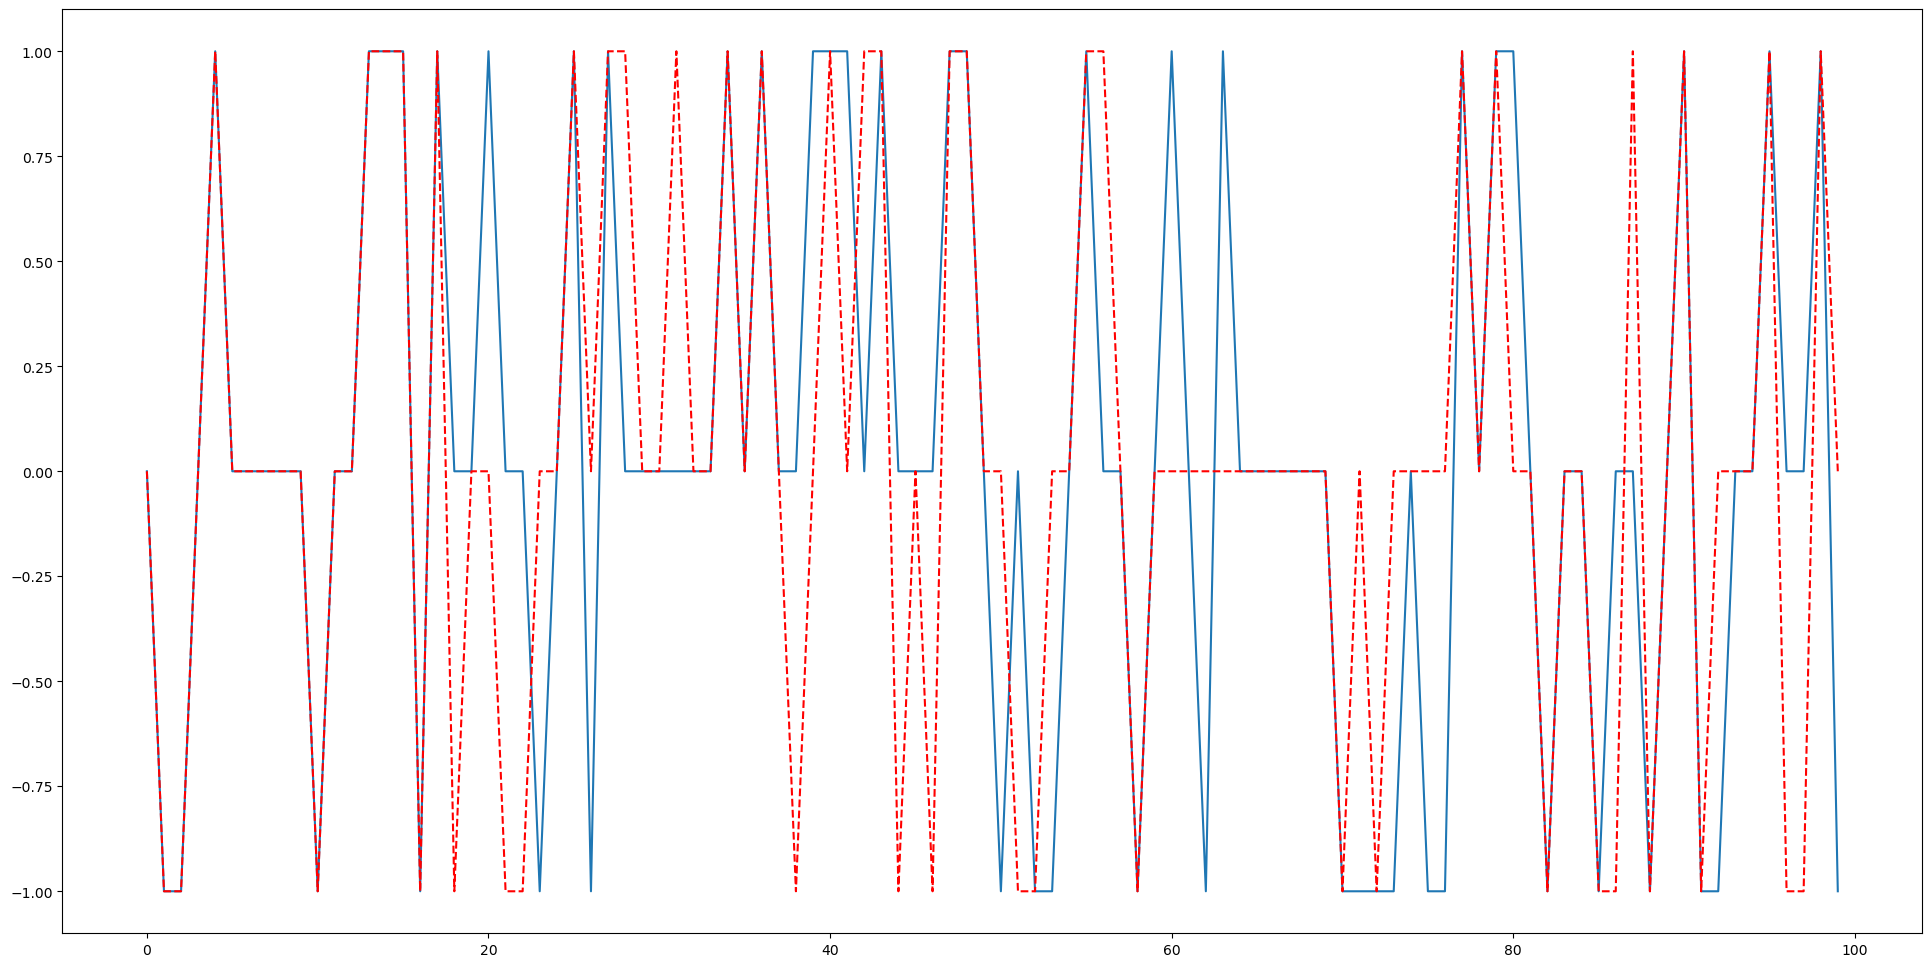

In [90]:
plt.figure(figsize=(24,12))
plt.plot(cmp[-200:-100])
plt.plot(y_test[-200:-100],'r', linestyle='--' )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

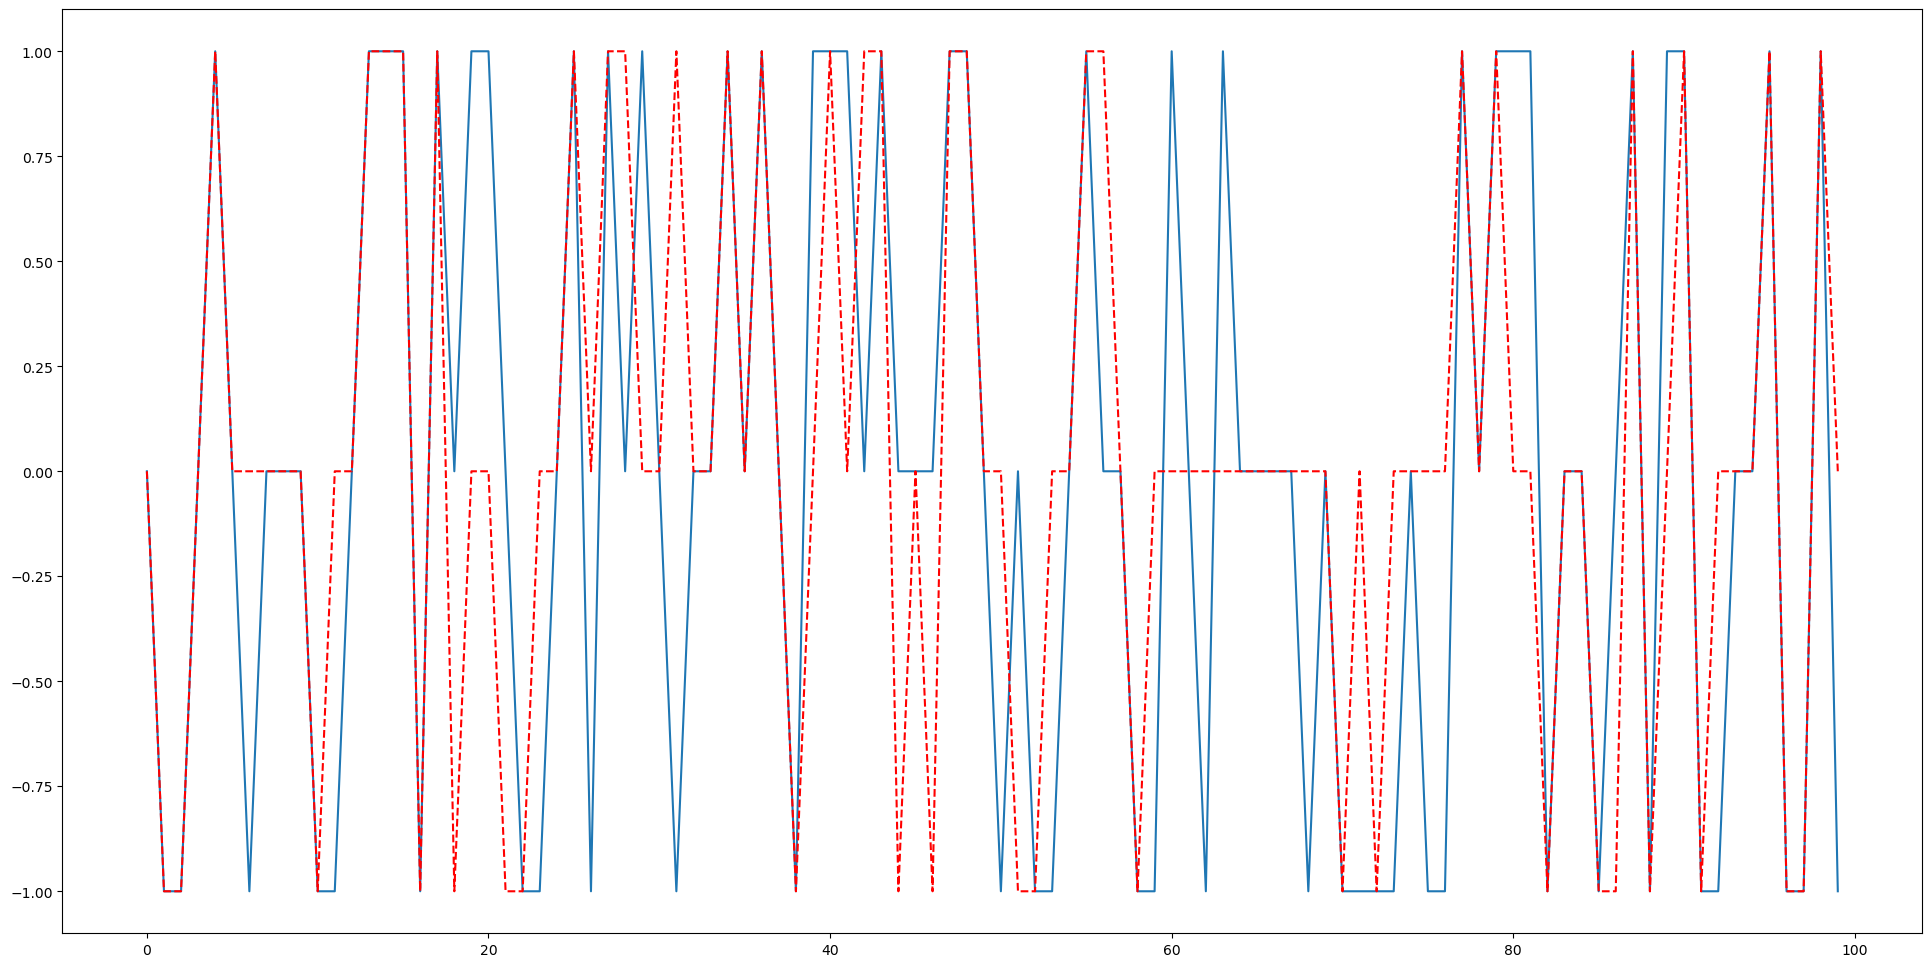

In [92]:
plt.figure(figsize=(24,12))
plt.plot(cmp[-200:-100])
plt.plot(y_test[-200:-100],'r', linestyle='--' )
plt.show